# I. Numpy

### Импортируйте NumPy

In [2]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [26]:
zeros = np.zeros(10)
zeros[4] = 1
zeros = np.resize(zeros, (2,5))
zeros

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [27]:
ar = np.array(range(10, 50))
ar = np.flip(ar)
print([i for i in ar if not(i%2)])

[48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10]


### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [28]:
ar = np.arange(9).reshape(3,3)
ar

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [30]:
ar = np.random.randint(0, 15, size = (4,3,2))
print(ar.min(), ar.max())

0 14


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [31]:
ar1, ar2 = np.random.randint(0, 20, size = (6,4)), np.random.randint(0, 10, size = (4,3))
print(np.dot(ar1, ar2))

[[136 234 134]
 [ 35 166  29]
 [148 284 110]
 [115 293 145]
 [160 268 152]
 [129 257  83]]


### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [36]:
ar = np.random.randint(0, 20, size = (7,7))
mean = ar.mean()
std = ar.std()
norm = np.linalg.norm(ar)
ar = ar/norm
ar

array([[0.06557412, 0.11803342, 0.03934447, 0.01311482, 0.        ,
        0.1049186 , 0.01311482],
       [0.14426307, 0.22295202, 0.01311482, 0.17049272, 0.17049272,
        0.22295202, 0.17049272],
       [0.07868895, 0.20983719, 0.03934447, 0.09180377, 0.07868895,
        0.01311482, 0.14426307],
       [0.06557412, 0.23606684, 0.06557412, 0.11803342, 0.09180377,
        0.        , 0.18360754],
       [0.22295202, 0.18360754, 0.07868895, 0.1049186 , 0.22295202,
        0.19672237, 0.23606684],
       [0.0524593 , 0.17049272, 0.1049186 , 0.23606684, 0.01311482,
        0.23606684, 0.03934447],
       [0.11803342, 0.01311482, 0.1573779 , 0.09180377, 0.23606684,
        0.19672237, 0.1049186 ]])

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузите датасет Tips из набора датасетов seaborn

In [4]:
tips = sns.load_dataset('tips')

### Посмотрите на первые 5 строчек

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [9]:
num_row, num_cols = tips.shape
num_row, num_cols

(244, 7)

### Проверьте есть ли пропуски в данных

In [13]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


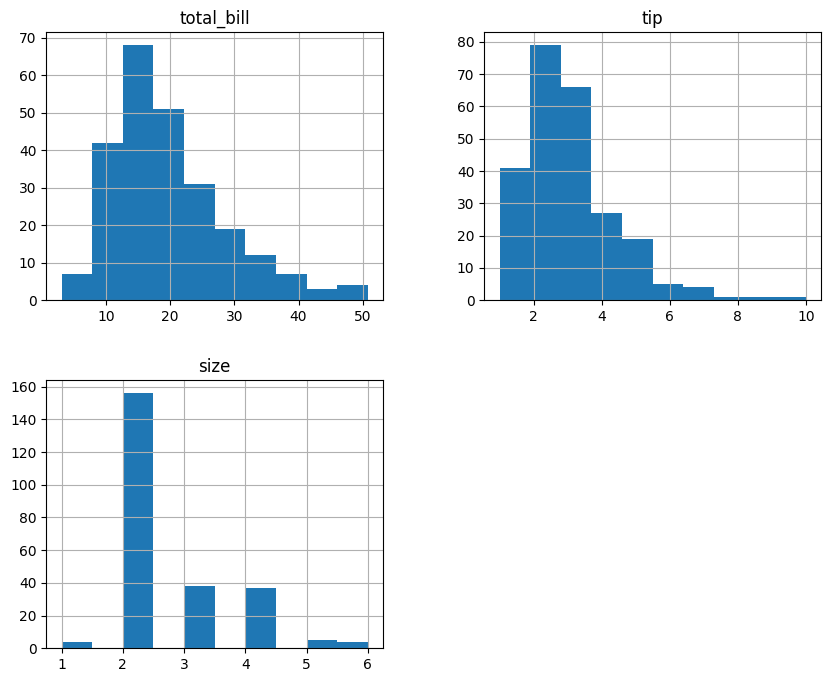

In [19]:
print(tips.describe())


tips.hist(bins=10, figsize=(10,8))
plt.show()

### Найдите максимальное значение 'total_bill'

In [20]:
tips['total_bill'].max()

50.81

### Найдите количество курящих людей

In [22]:
tips['smoker'].value_counts()['Yes']

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [23]:
tips.groupby('day')['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [30]:
median_total_bill = tips['total_bill'].median()


selected_rows = tips[tips['total_bill'] > median_total_bill]

mean_tip_by_sex = selected_rows.groupby('sex')['tip'].mean()

mean_tip_by_sex

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [33]:
tips['smoker_binary'] = (tips['smoker'] == 'Yes').astype(int)

tips.head()

,total_bill,tip,sex,smoker,day,time,size,smoker_binary
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

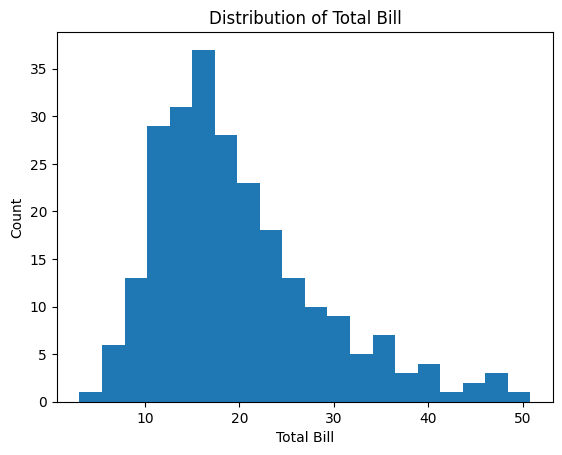

In [34]:
plt.hist(tips['total_bill'], bins=20)
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.title('Distribution of Total Bill')
plt.show()

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

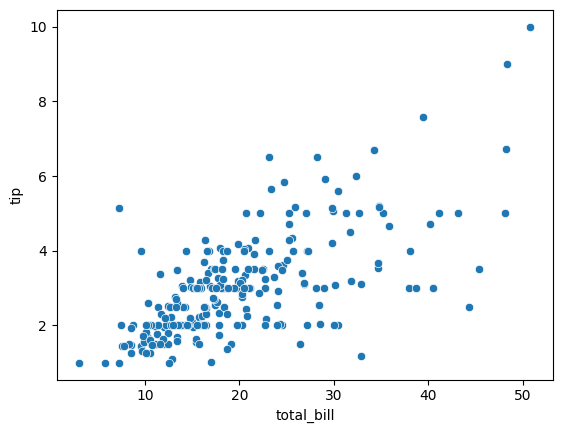

In [35]:
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

### Постройте pairplot

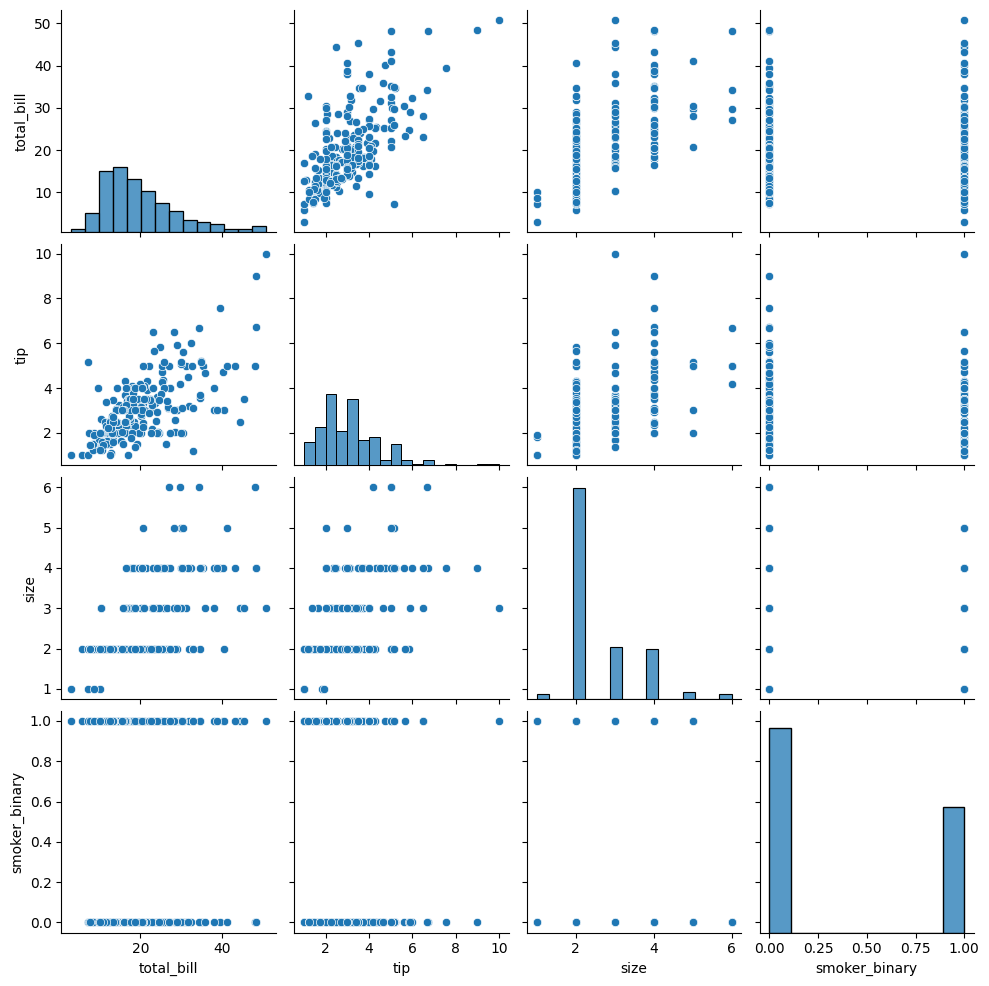

In [36]:
sns.pairplot(tips)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

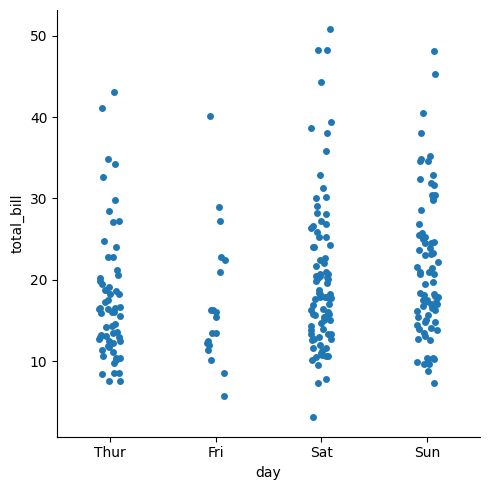

In [37]:
sns.catplot(x="day", y="total_bill", data=tips)

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

<Axes: xlabel='tip', ylabel='Count'>

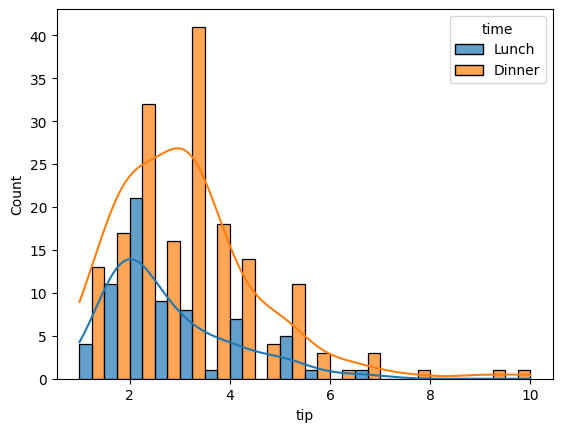

In [40]:
sns.histplot(data=tips, x='tip', hue='time', kde=True, alpha=0.7, multiple='dodge')

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоcти от признака 'smoker'

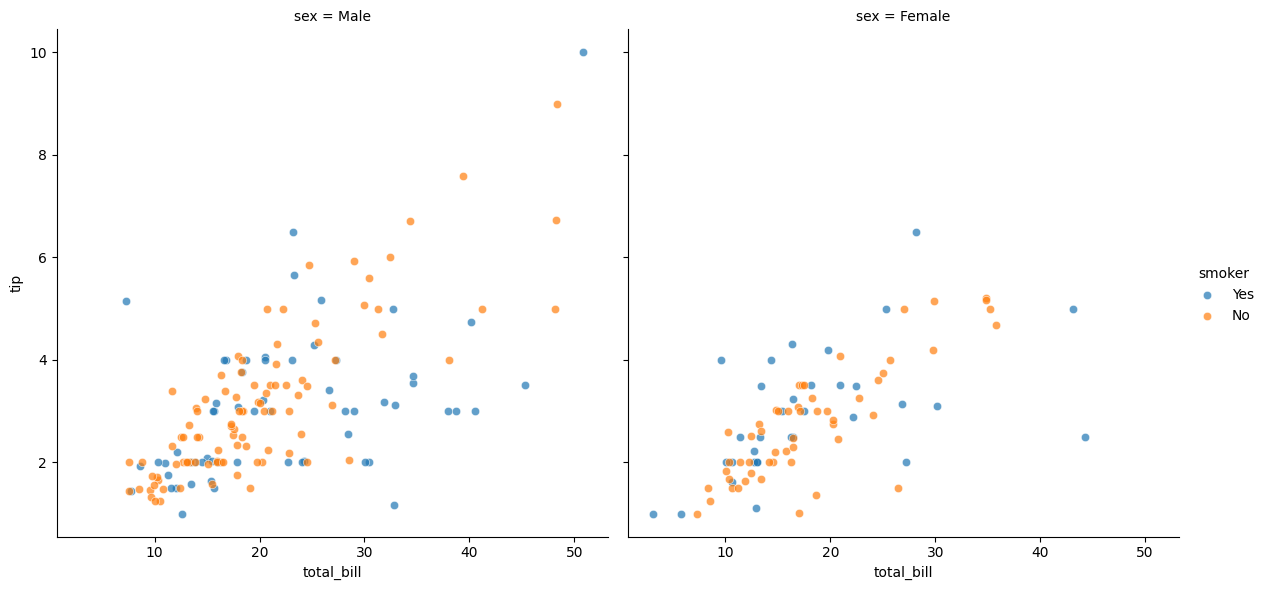

In [47]:
g = sns.FacetGrid(tips, col='sex', hue='smoker', height=6)

g.map(sns.scatterplot, 'total_bill', 'tip', alpha=0.7)

# Добавляем легенду
g.add_legend()

# Отображаем графики
plt.show()

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

Исходя из проделанного анализа, можно сделать несколько выводов о датасете:

1) Распределение признака 'total_bill' имеет форму близкую к нормальному, что говорит о том, что средний чек в ресторане примерно одинаков для большинства посетителей.

2) Средний чек в выходные дни (пятница, суббота, воскресенье) выше, чем в будние дни, что может говорить о том, что люди чаще посещают рестораны в эти дни и больше тратят на еду и напитки.

3) Средняя чаевая в зависимости от пола не имеет существенных отличий.

4) Посетители, курящие, обычно оставляют чаевые большего размера, чем некурящие.

5) Время, когда клиенты посещают ресторан, также может влиять на размер чаевых, которые они оставляют. Посетители, приходящие на обед, склонны оставлять меньше чаевых, чем те, кто приходит на ужин.

6) Признак 'size' имеет высокую корреляцию с признаком 'total_bill', что говорит о том, что большинство посетителей заказывают примерно одинаковое количество блюд.